In [41]:
#Import the essential libraries
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
register_matplotlib_converters()
from time import time
from statsmodels.tsa.stattools import adfuller

In [101]:
#Read the data
df = pd.read_csv('ice_cream_vs_heater.csv',index_col = 0, parse_dates = True)
df.head()

,heater,ice cream
Month,,
2004-01-01,27,13
2004-02-01,18,15
2004-03-01,14,16
2004-04-01,13,19
2004-05-01,13,21


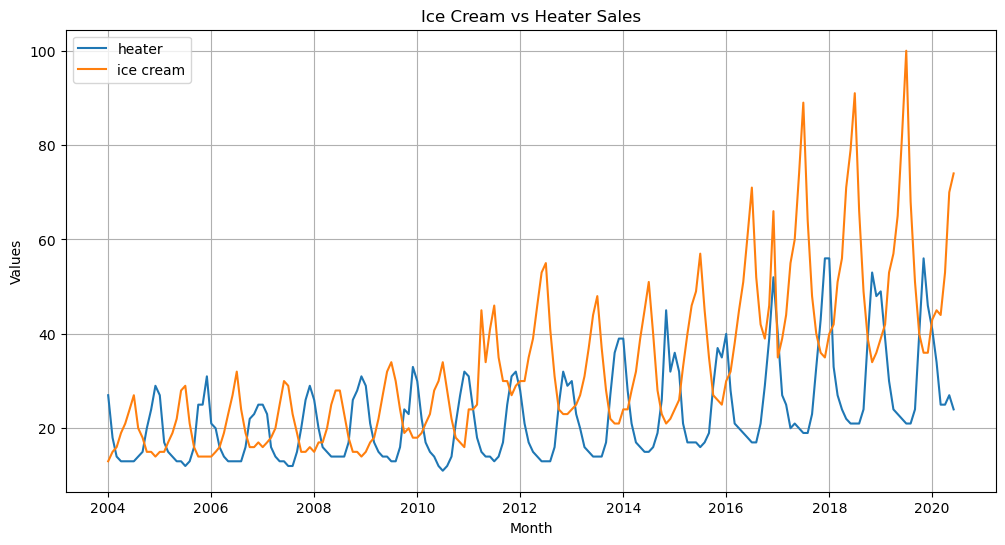

In [103]:
# Plot the data to identify the components of the time series
plt.figure(figsize=(12,6))
plt.plot(df.index, df.iloc[:, 0], label=df.columns[0])
plt.plot(df.index, df.iloc[:, 1], label=df.columns[1])

plt.title('Ice Cream vs Heater Sales')
plt.xlabel('Month')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [105]:
#calculating the mean and standard deviation of the time series
df_mean = df.mean()
df_std = df.std()

In [107]:
#Normalising the time series to center it around the mean
for col in df.columns:
    df[col] = (df[col] - df_mean[col])/df_std[col]

In [109]:
df.head()

,heater,ice cream
Month,,
2004-01-01,0.429490,-1.174946
2004-02-01,-0.489299,-1.057807
2004-03-01,-0.897650,-0.999237
2004-04-01,-0.999738,-0.823527
2004-05-01,-0.999738,-0.706388


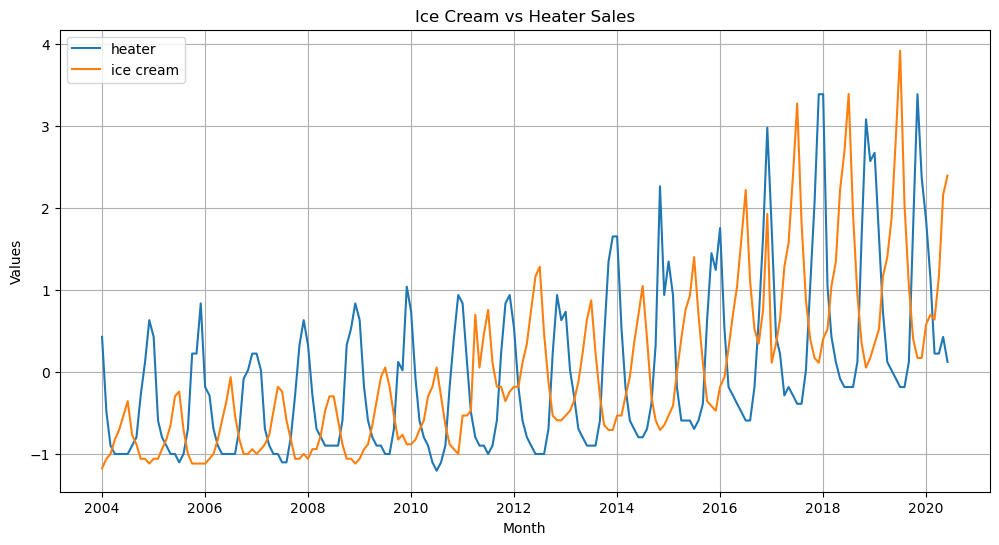

In [111]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df.iloc[:, 0], label=df.columns[0])
plt.plot(df.index, df.iloc[:, 1], label=df.columns[1])

plt.title('Ice Cream vs Heater Sales')
plt.xlabel('Month')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [113]:
def check_stationarity(series, alpha=0.05, verbose=True):
    """
    Performs ADF test to check stationarity of a time series.
    
    Parameters:
        series (pd.Series): The time series data.
        alpha (float): Significance level (default 0.05).
        verbose (bool): Whether to print detailed output.
    
    Prints:
        Results of the ADF test
    """
    result = adfuller(series.dropna(), autolag='AIC')
    output = {
        'ADF Statistic': result[0],
        'p-value': result[1],
        'Used Lags': result[2],
        'Number of Observations': result[3],
        'Critical Values': result[4],
        'Stationary': result[1] < alpha
    }

    if verbose:
        print("=== ADF Test Results ===")
        print(f"ADF Statistic     : {output['ADF Statistic']:.4f}")
        print(f"p-value           : {output['p-value']:.4f}")
        print(f"Used Lags         : {output['Used Lags']}")
        print(f"Observations Used : {output['Number of Observations']}")
        print("Critical Values   :")
        for key, value in output['Critical Values'].items():
            print(f"   {key} : {value:.4f}")
        print(f"\nConclusion: The series is {'Stationary ✅' if output['Stationary'] else 'Non-Stationary ❌'} (alpha={alpha})")

In [115]:
check_stationarity(df['heater']),check_stationarity(df['ice cream'])
#both the series are not stationary

=== ADF Test Results ===
ADF Statistic     : 0.9501
p-value           : 0.9937
Used Lags         : 11
Observations Used : 186
Critical Values   :
   1% : -3.4660
   5% : -2.8772
   10% : -2.5751

Conclusion: The series is Non-Stationary ❌ (alpha=0.05)
=== ADF Test Results ===
ADF Statistic     : -0.3039
p-value           : 0.9249
Used Lags         : 13
Observations Used : 184
Critical Values   :
   1% : -3.4664
   5% : -2.8774
   10% : -2.5752

Conclusion: The series is Non-Stationary ❌ (alpha=0.05)


(None, None)

In [117]:
df = df.diff().dropna()

In [125]:
def plot_time_series(df,col_index):
    plt.figure(figsize=(12,6))
    plt.plot(df.index, df.iloc[:, col_index], label=df.columns[col_index])
    plt.title('Ice Cream')
    plt.xlabel('Month')
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True)
    plt.show()

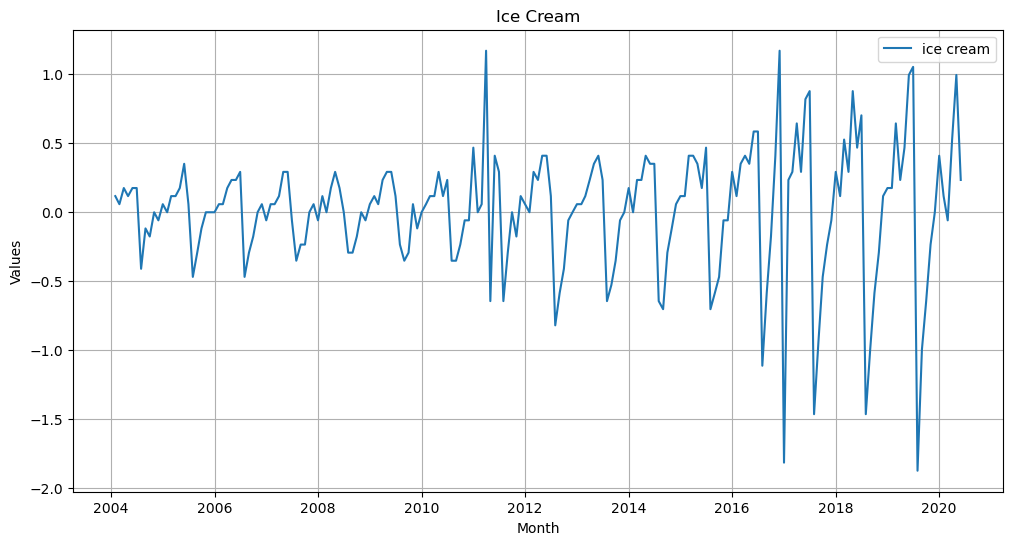

In [127]:
plot_time_series(df,1)

In [129]:
annual_volatility = df.groupby(df.index.year).std()
annual_volatility

,heater,ice cream
Month,,
2004,0.415481,0.184201
2005,0.474527,0.214837
2006,0.400148,0.227698
2007,0.359839,0.198947
2008,0.396182,0.183239
2009,0.499810,0.221038
2010,0.459566,0.211668
2011,0.443924,0.501018
2012,0.471104,0.389711


In [131]:
df['year'] = df.index.year
df['heater_annual_vol'] = df['year'].map(annual_volatility['heater'])
df['ice_cream_annual_vol'] = df['year'].map(annual_volatility['ice cream'])
df.head()

,heater,ice cream,year,heater_annual_vol,ice_cream_annual_vol
Month,,,,,
2004-02-01,-0.918789,0.11714,2004,0.415481,0.184201
2004-03-01,-0.408351,0.05857,2004,0.415481,0.184201
2004-04-01,-0.102088,0.17571,2004,0.415481,0.184201
2004-05-01,0.000000,0.11714,2004,0.415481,0.184201
2004-06-01,0.000000,0.17571,2004,0.415481,0.184201


In [133]:
df['ice cream'] = df['ice cream']/df['ice_cream_annual_vol']
df['heater'] = df['heater']/df['heater_annual_vol']
df.drop(columns = ['year'],inplace = True)
df.head()

,heater,ice cream,heater_annual_vol,ice_cream_annual_vol
Month,,,,
2004-02-01,-2.211387,0.635934,0.415481,0.184201
2004-03-01,-0.982838,0.317967,0.415481,0.184201
2004-04-01,-0.245710,0.953901,0.415481,0.184201
2004-05-01,0.000000,0.635934,0.415481,0.184201
2004-06-01,0.000000,0.953901,0.415481,0.184201


In [139]:
month_avgs = df.groupby(df.index.month).mean()
month_avgs

,heater,ice cream,heater_annual_vol,ice_cream_annual_vol
Month,,,,
1,-0.428360,0.130345,0.580717,0.415976
2,-1.483129,0.250194,0.570997,0.402342
3,-1.063595,0.433016,0.570997,0.402342
4,-0.442926,0.838085,0.570997,0.402342
5,-0.121663,0.967273,0.570997,0.402342
6,-0.128425,0.987311,0.570997,0.402342
7,-0.107093,0.735052,0.580018,0.404376
8,0.075720,-1.821285,0.580018,0.404376
9,0.544638,-1.307661,0.580018,0.404376


In [143]:
df['month'] = df.index.month
df['heater_monthly_avg'] = df['month'].map(month_avgs['heater'])
df['ice_cream_monthly_avg'] = df['month'].map(month_avgs['ice cream'])
df.drop(columns = ['month'],inplace = True)
df.head()

,heater,ice cream,heater_annual_vol,ice_cream_annual_vol,heater_monthly_avg,ice_cream_monthly_avg
Month,,,,,,
2004-02-01,-2.211387,0.635934,0.415481,0.184201,-1.483129,0.250194
2004-03-01,-0.982838,0.317967,0.415481,0.184201,-1.063595,0.433016
2004-04-01,-0.245710,0.953901,0.415481,0.184201,-0.442926,0.838085
2004-05-01,0.000000,0.635934,0.415481,0.184201,-0.121663,0.967273
2004-06-01,0.000000,0.953901,0.415481,0.184201,-0.128425,0.987311


In [145]:
df['heater'] = df['heater']- df['heater_monthly_avg']
df['ice cream'] = df['ice cream'] - df['ice_cream_monthly_avg']
df.head()

,heater,ice cream,heater_annual_vol,ice_cream_annual_vol,heater_monthly_avg,ice_cream_monthly_avg
Month,,,,,,
2004-02-01,-0.728257,0.385740,0.415481,0.184201,-1.483129,0.250194
2004-03-01,0.080757,-0.115049,0.415481,0.184201,-1.063595,0.433016
2004-04-01,0.197217,0.115816,0.415481,0.184201,-0.442926,0.838085
2004-05-01,0.121663,-0.331339,0.415481,0.184201,-0.121663,0.967273
2004-06-01,0.128425,-0.033411,0.415481,0.184201,-0.128425,0.987311


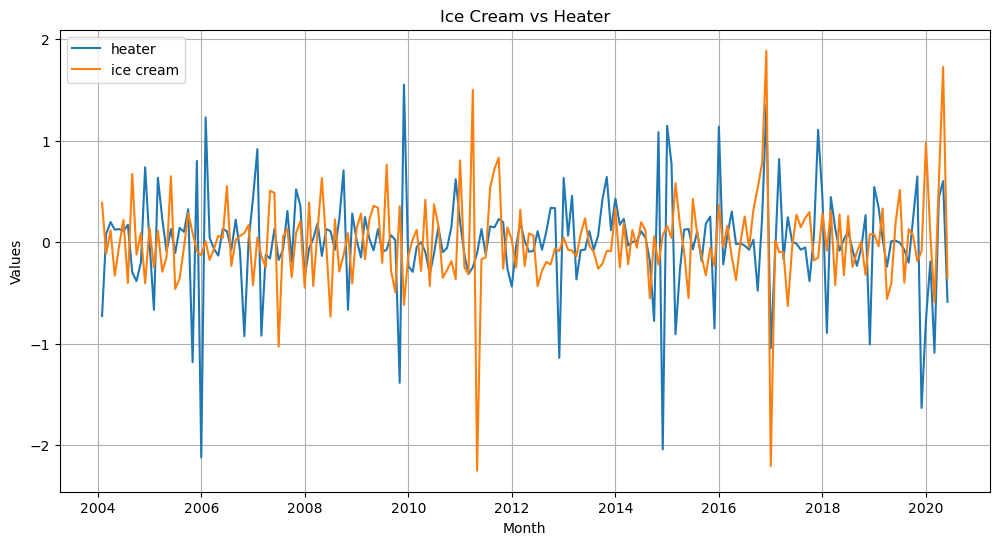

In [149]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df.iloc[:, 0], label=df.columns[0])
plt.plot(df.index, df.iloc[:,1],label=df.columns[1])
plt.title('Ice Cream vs Heater')
plt.xlabel('Month')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [151]:
def plot_acf_pacf(series, lags=15, alpha=0.05, title_prefix=''):
    """
    Plots the ACF and PACF of a time series.

    Parameters:
        series (pd.Series): The time series data.
        lags (int): Number of lags to show.
        alpha (float): Confidence interval level.
        title_prefix (str): Prefix to add to the plot titles.
    """
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    plot_acf(series, lags=lags, ax=axes[0], alpha=alpha)
    axes[0].set_title(f'{title_prefix} ACF')

    plot_pacf(series, lags=lags, ax=axes[1], alpha=alpha, method='ywm')
    axes[1].set_title(f'{title_prefix} PACF')

    plt.tight_layout()
    plt.show()

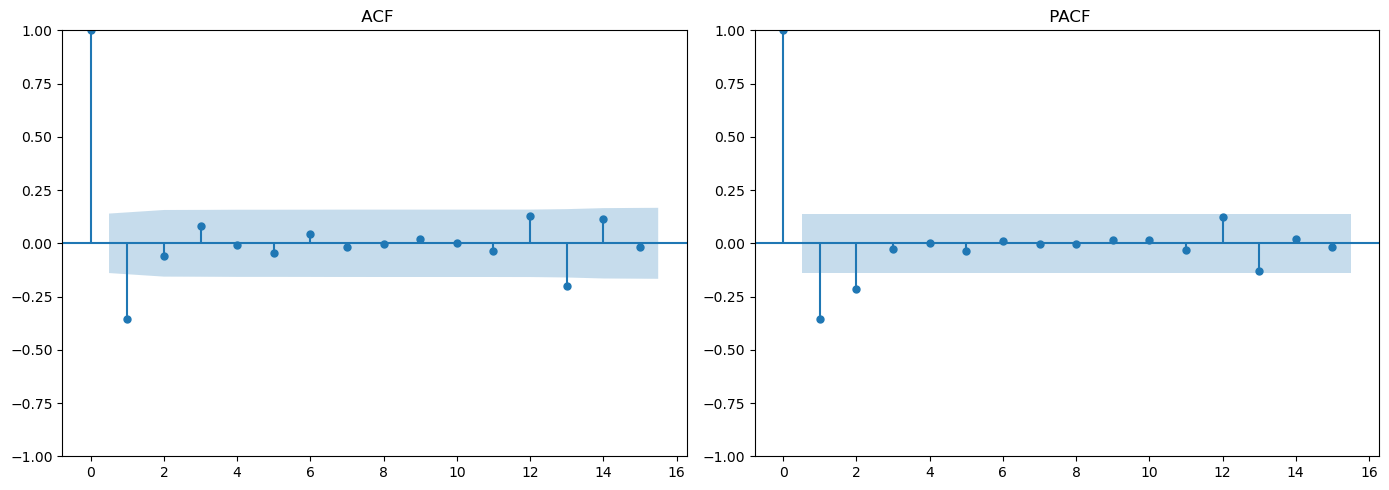

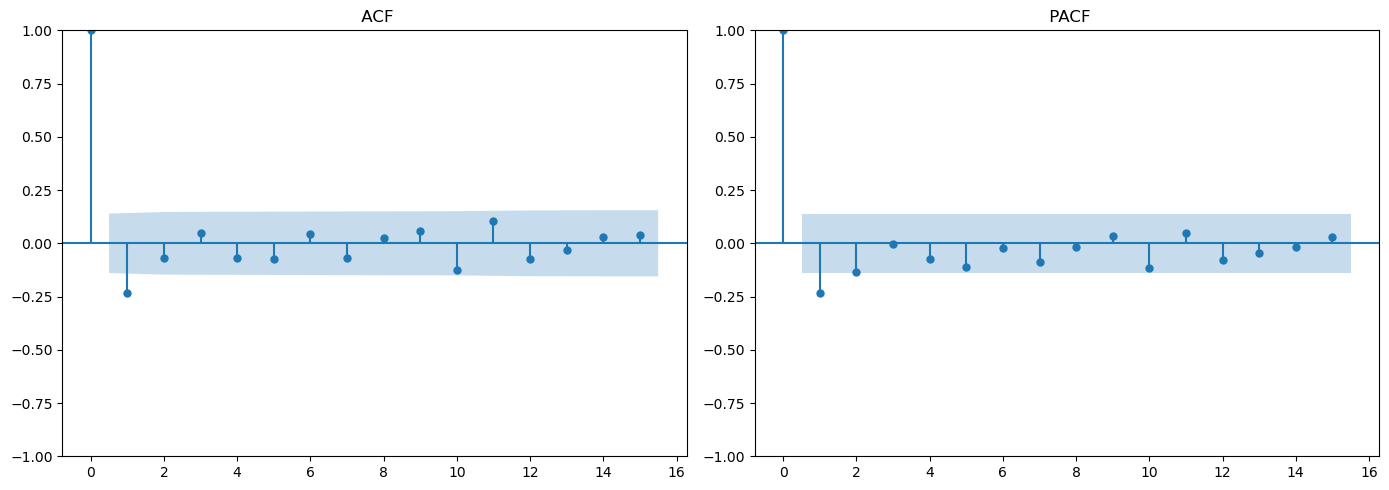

(None, None)

In [155]:
plot_acf_pacf(df['heater']),plot_acf_pacf(df['ice cream'])

In [169]:
for lag in range(1, 14):
    heater_series = df['heater'].iloc[lag:]
    lagged_ice_cream_series = df['ice cream'].iloc[:-lag]
    pearson = pearsonr(heater_series,lagged_ice_cream_series)
    if pearson.pvalue<=0.05:
        print('Lag: %s'%lag)
        print(pearson)
    else:
        continue

Lag: 13
PearsonRResult(statistic=0.1980890219842976, pvalue=0.007029107082073416)


In [171]:
ice_cream_df = df[['ice cream', 'heater']]

In [175]:
model = VAR(ice_cream_df)
model_fit = model.fit(maxlags=13)
model_fit.summary()

/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 26, Apr, 2025
Time:                     21:42:12
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -1.92349
Nobs:                     184.000    HQIC:                  -2.48459
Log likelihood:          -204.405    FPE:                  0.0571123
AIC:                     -2.86700    Det(Omega_mle):       0.0434311
--------------------------------------------------------------------
Results for equation ice cream
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                -0.016054         0.034105           -0.471           0.638
L1.ice cream         -0.287811         0.079633           -3.614           0.000
L1.heater            -0.121251         0.073673         

ht hat = -0.405367*ht-1 - 0.193569*ht-2 +0.203451*it-13